## Importing dependencies

First let us import all the modules and packages that will be required.

In [3]:
# Importing necessary modules
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O
from PIL import Image
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
from tensorflow.keras.utils import to_categorical
from skimage import io
print(os.listdir(data_path))

['data']


The dataset is already been split into train, test and validation (so we dont need to do it later on)

In [4]:
# Train, test and validation directories
train_dir = "/kaggle/input/gestures-hand/data/data/train"
val_dir = "/kaggle/input/gestures-hand/data/data/validation"
test_dir = "/kaggle/input/gestures-hand/data/data/test"

### Visualising each gesture
Show one image of the each of the 8 classes present.

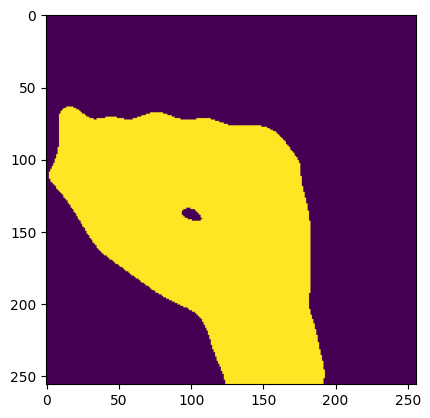

In [6]:
img_array1 = np.array(Image.open('/kaggle/input/gestures-hand/data/data/train/fist/123.png'))
plt.imshow(img_array1)

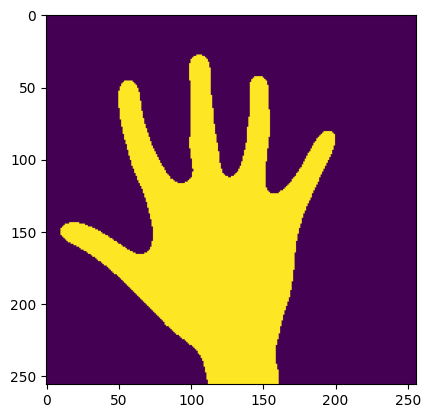

In [7]:
img_array2 = np.array(Image.open('/kaggle/input/gestures-hand/data/data/train/five/123.png'))
plt.imshow(img_array2)

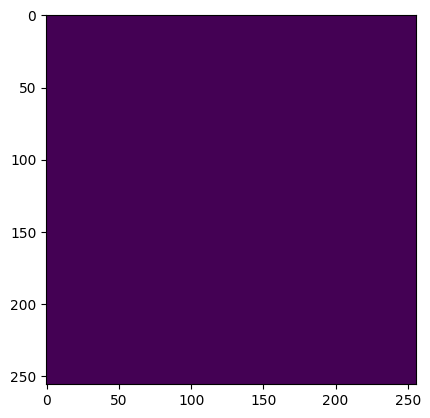

In [8]:
img_array3 = np.array(Image.open('/kaggle/input/gestures-hand/data/data/train/none/123.png'))
plt.imshow(img_array3)

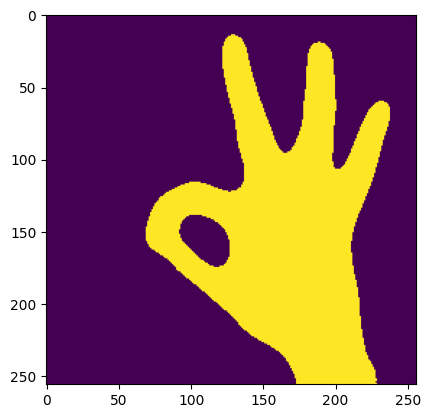

In [9]:
img_array4 = np.array(Image.open('/kaggle/input/gestures-hand/data/data/train/okay/123.png'))
plt.imshow(img_array4)

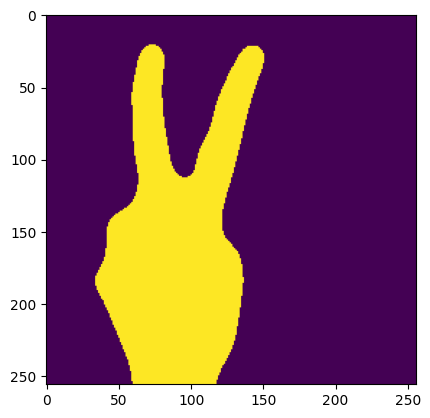

In [10]:
img_array5 = np.array(Image.open('/kaggle/input/gestures-hand/data/data/train/peace/123.png'))
plt.imshow(img_array5)

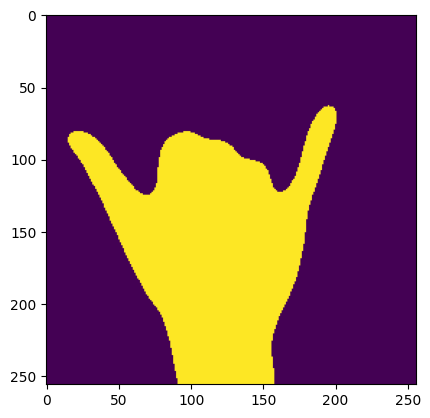

In [11]:
img_array6 = np.array(Image.open('/kaggle/input/gestures-hand/data/data/train/rad/123.png'))
plt.imshow(img_array6)

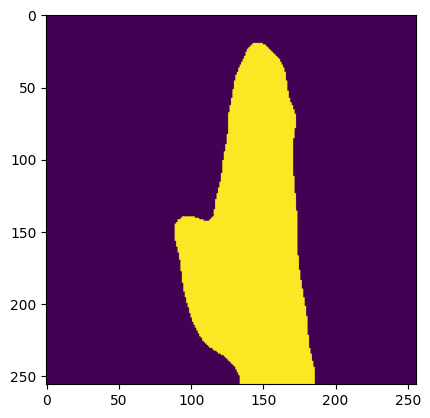

In [12]:
img_array7 = np.array(Image.open('/kaggle/input/gestures-hand/data/data/train/straight/123.png'))
plt.imshow(img_array7)

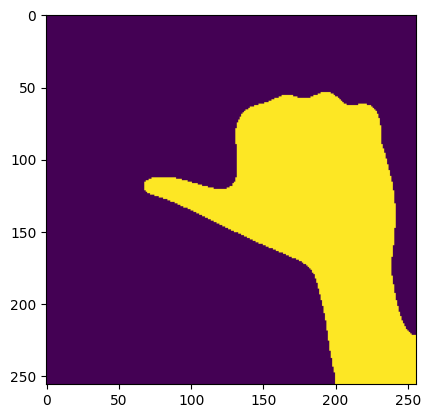

In [13]:
img_array8 = np.array(Image.open('/kaggle/input/gestures-hand/data/data/train/thumbs/123.png'))
plt.imshow(img_array8)

In [14]:
# Declaring variables
outputSize = len(os.listdir(train_dir))
epochs = 30 # Number of epochs

## Data Augmentation

Image data augmentation is a technique that can be used to artificially expand the size of a training dataset by creating modified versions of images in the dataset.




In [15]:
# Train Data Generator to do data augmentation on training images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [16]:
# Test Data Generator
test_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
# Setting up the train generator to flow from the train directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (256,256),
    batch_size = 32,
    class_mode = 'categorical',
    color_mode = 'grayscale'
)

# Doing the same as above for the validation directory
val_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size = (256,256),
    batch_size = 32,
    class_mode = 'categorical',
    color_mode = 'grayscale'
)

Found 7999 images belonging to 8 classes.
Found 3999 images belonging to 8 classes.


## Defining the CNN


In [18]:
from tensorflow.keras.layers import Input

In [19]:
# Function to create keras model for different number of gestures
def create_model(outputSize):
    model = Sequential()
    model.add(Input(shape=(256,256,1)))
    model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
    model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
    model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Flatten())
    model.add(Dropout(rate=0.5))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(units=outputSize, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [20]:
# Creating the model
model = create_model(outputSize)

In [21]:
# Summary of model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 252, 252, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 124, 124, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 122, 122, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 59, 59, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 57, 57, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    51,380,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         4,104 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,671,272 (197.11 MB)

 Trainable params: 51,671,272 (197.11 MB)

 Non-trainable params: 0 (0.00 B)

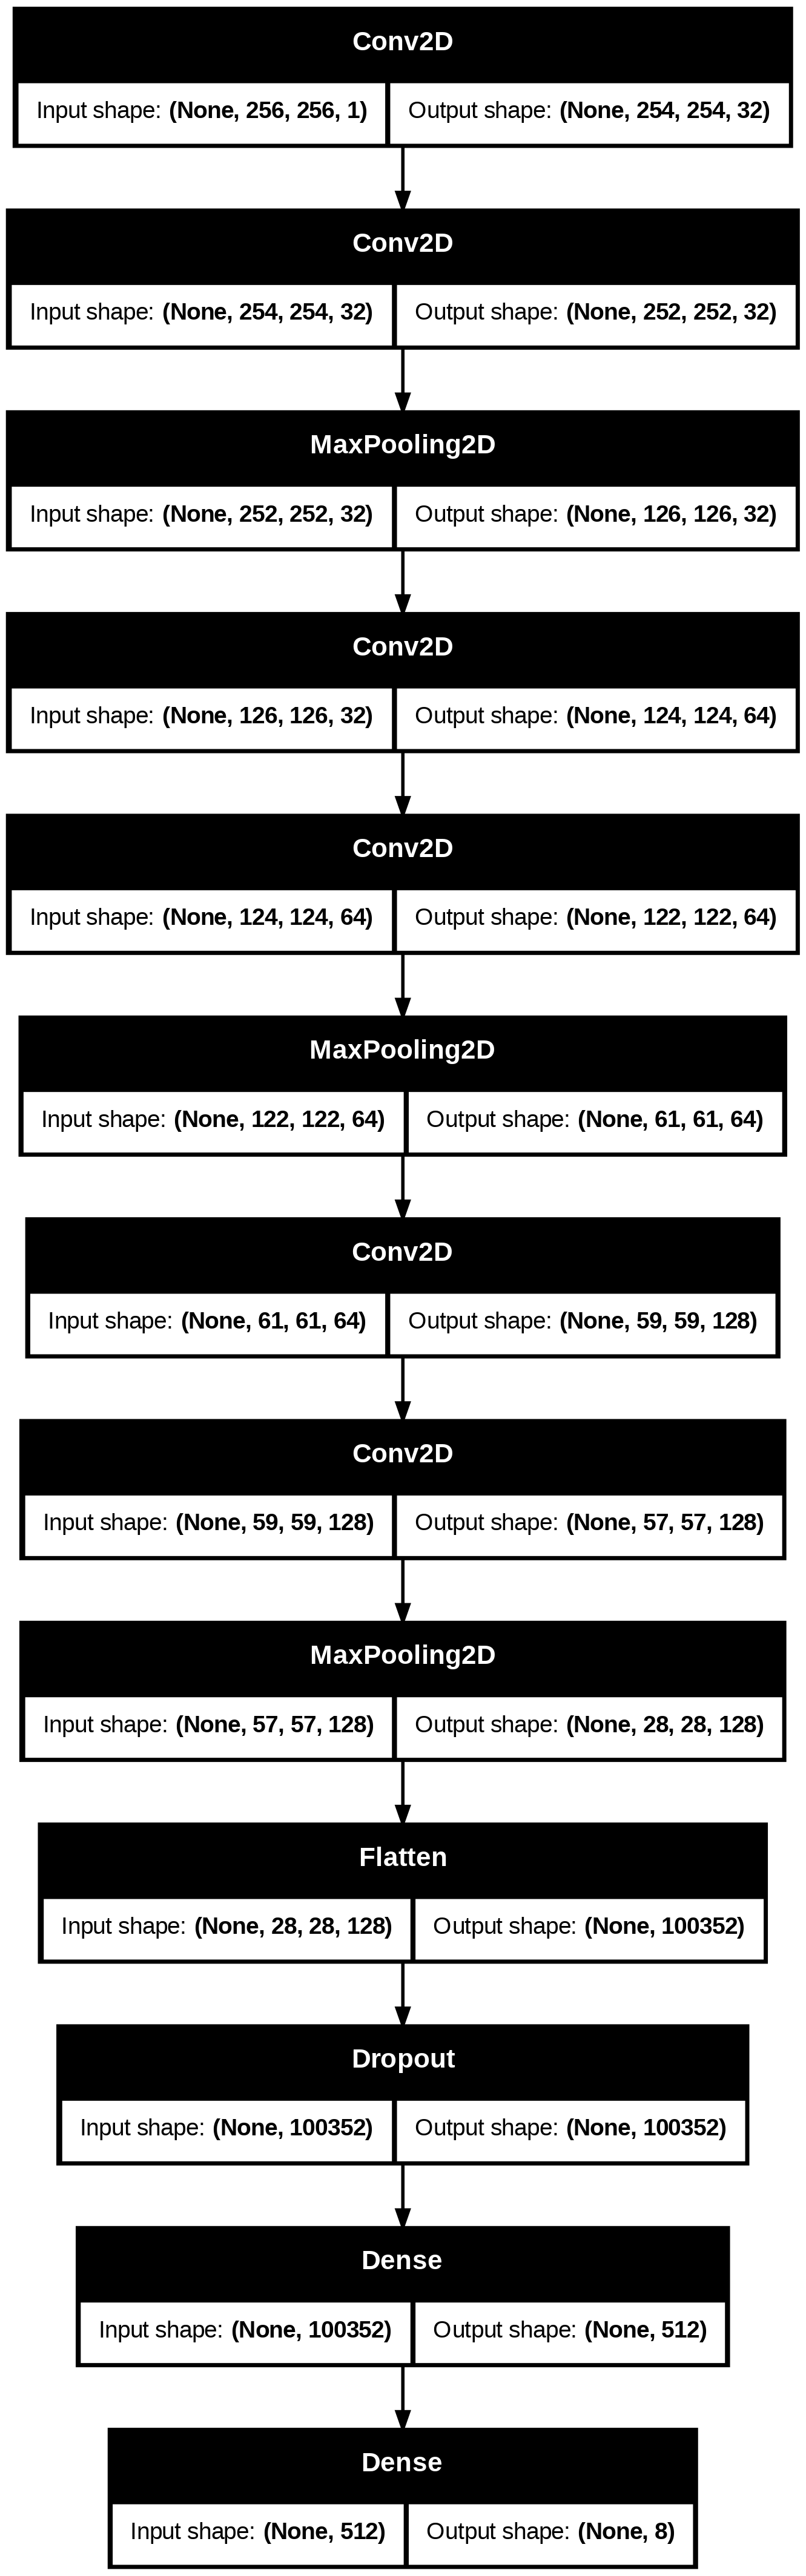

In [22]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [24]:
# Fitting the model to the data based on a 32 batch size
history = model.fit(
    train_generator,
    steps_per_epoch=outputSize*1000//32,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=outputSize*200//32
)

Epoch 1/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 110s 366ms/step - accuracy: 0.4278 - loss: 1.4932 - val_accuracy: 0.8469 - val_loss: 0.4215
Epoch 2/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 137s 411ms/step - accuracy: 0.7654 - loss: 0.6243 - val_accuracy: 0.9075 - val_loss: 0.2624
Epoch 3/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 81s 324ms/step - accuracy: 0.8518 - loss: 0.4334 - val_accuracy: 0.9500 - val_loss: 0.1644
Epoch 4/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 81s 326ms/step - accuracy: 0.8770 - loss: 0.3510 - val_accuracy: 0.9256 - val_loss: 0.2500
Epoch 5/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 328ms/step - accuracy: 0.8930 - loss: 0.3002 - val_accuracy: 0.9756 - val_loss: 0.1167
Epoch 6/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 81s 325ms/step - accuracy: 0.9144 - loss: 0.2687 - val_accuracy: 0.9688 - val_loss: 0.1071
Epoch 7/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 62s 247ms/step - accuracy: 0.9242 - loss: 0.2171 - val_accuracy: 0.9912 - val_loss: 0.0429
Epoch 8/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 330ms/step - accuracy: 0.9383 - loss:

## Results and Performance Metrics

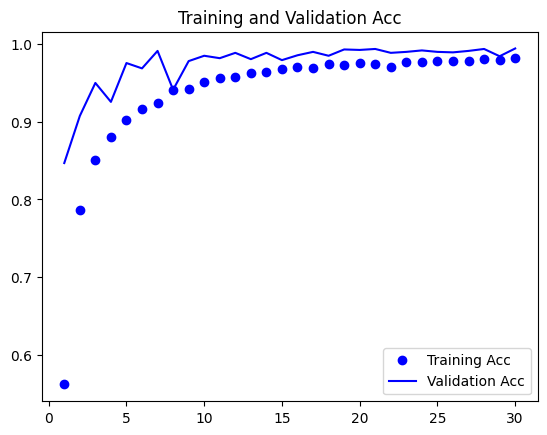

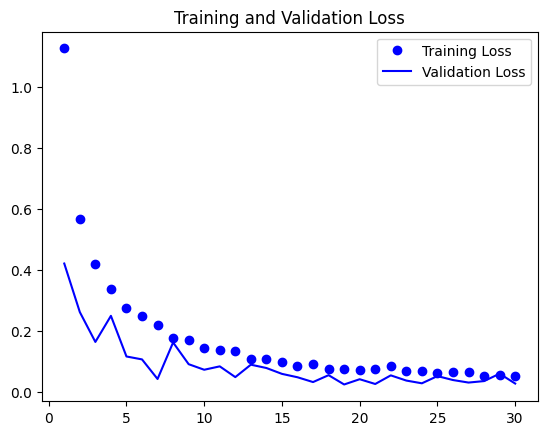

<Figure size 640x480 with 0 Axes>

In [25]:
# Plotting training acc/loss and val acc/loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
range_ep = epochs +1
epoch_x = range(1, range_ep)

plt.plot(epoch_x,acc,'bo',label="Training Acc")
plt.plot(epoch_x,val_acc,'b',label='Validation Acc')
plt.title('Training and Validation Acc')
plt.legend()
plt.figure()

plt.plot(epoch_x,loss,'bo',label="Training Loss")
plt.plot(epoch_x,val_loss,'b',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.figure()

plt.show()

In [26]:
# Setting up the test generator to flow from the test directory
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (256,256),
    batch_size = 32,
    class_mode = 'categorical',
    color_mode = 'grayscale'
)

Found 4000 images belonging to 8 classes.


In [28]:
test_loss, test_acc = model.evaluate(
    test_generator,
    steps=outputSize * 500 // 32
)
print("Test Acc:", test_acc)
print("Test Loss:", test_loss)


125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.9977 - loss: 0.0082
Test Acc: 0.9977499842643738
Test Loss: 0.008072851225733757


## Future Work

The model can be improved by
- reducing overfitting by earlystopping
- random train test split

